#### Model buidling using ARIMA 

##### a. Data Ingestion: 
    -   Importing the Libraries
    -   Loading the Data
    -   Set datetime as the index of dataframe
    -   Check the datatype of the index and convert it to datetime if necessary.

##### b. EDA of the Data
 
1. **Summary Statistics:** Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.
    
2. **Visualize the Time Series Data** 
<ol type="I">
<li>Plot the Time Series data</li>
<li>Plot the rolling mean and rolling standard deviation of the Time Series data.</li>
<li>Decompose the Time Series Data check for any trends, seasonality, and Noise.</li>
<li>Plot the decomposed components to get a better understanding of the Time Series data.</li>
</ol>

3. **Stationarity Check**
<ol type="I"> 
<li>Check for stationarity.</li>
<li>Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.</li>
<li>Check for Autocorrelation</li>
<li>Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.</li>
</ol>

4. **Outlier Detection**
<ol type="I">
<li>Detect and handle outliers using statistical methods or machine learning techniques.</li>
<li>Check for Autocorrelation</li>
<li>Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.</li>
</ol>


##### c. Processing of the Data
##### d. Model Building 
##### e. Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [5]:
# Univariate Analysis
stock_data = df[['Date','Close']]

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date'] = pd.to_datetime(stock_data.Date)

C:\Users\pankr\AppData\Local\Temp\ipykernel_7260\2228350605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data.Date)


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data = stock_data.set_index("Date")

In [10]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [11]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


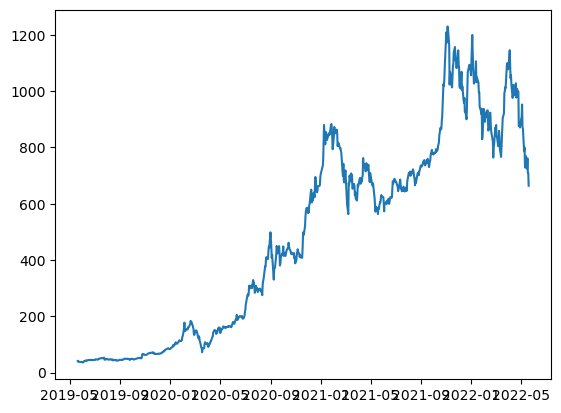

In [12]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

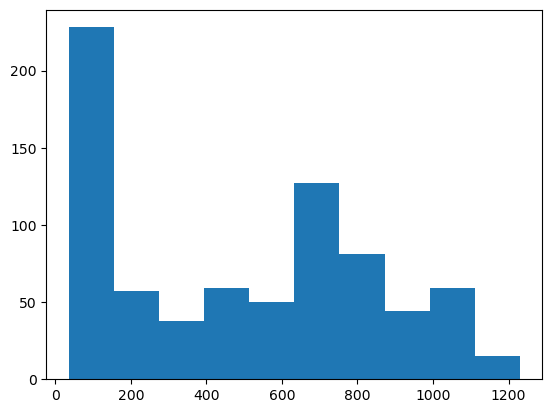

In [13]:
plt.hist(stock_data.Close)

<Axes: xlabel='Close', ylabel='Count'>

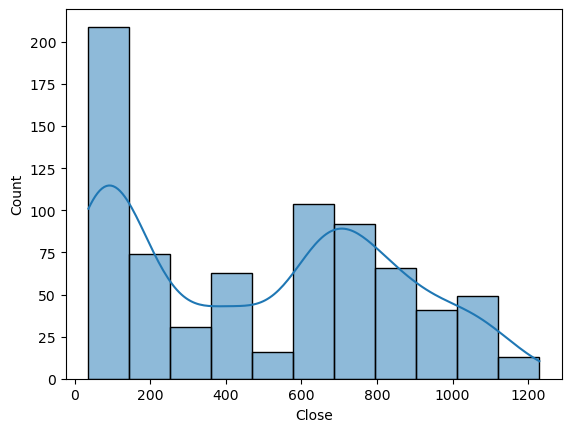

In [14]:
import seaborn as sns
sns.histplot(stock_data.Close,kde=True)

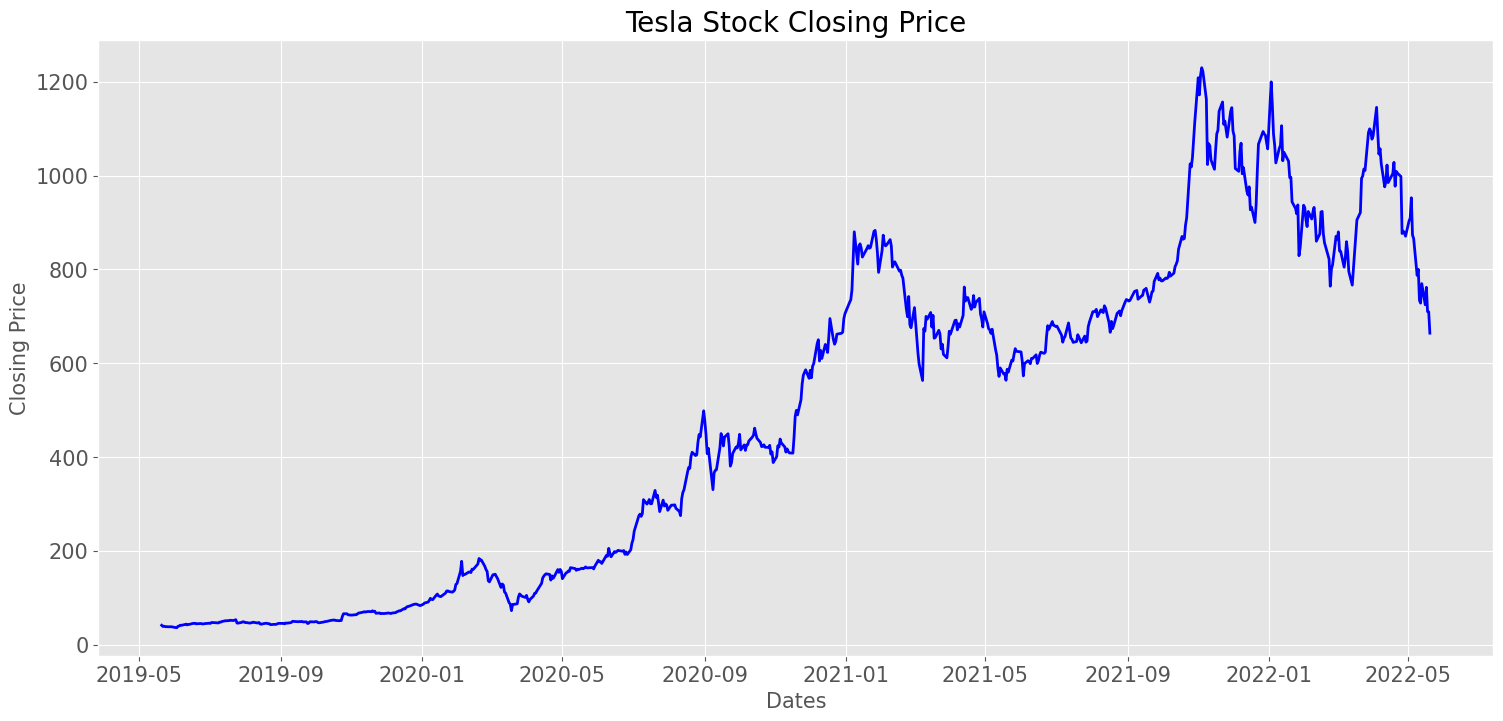

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=2,color='blue')
plt.title('Tesla Stock Closing Price',fontsize=20)
plt.show()

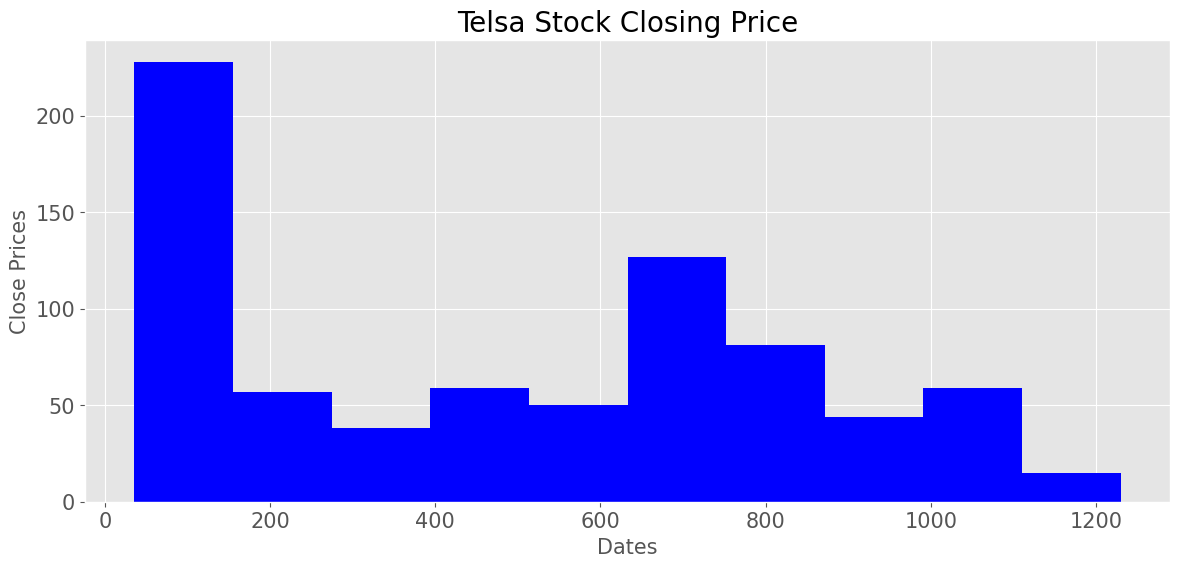

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
plt.grid(True)
plt.xlabel('Dates',fontsize=15)
plt.ylabel('Close Prices',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=2, color='blue')
plt.title('Telsa Stock Closing Price',fontsize=20)
plt.show()

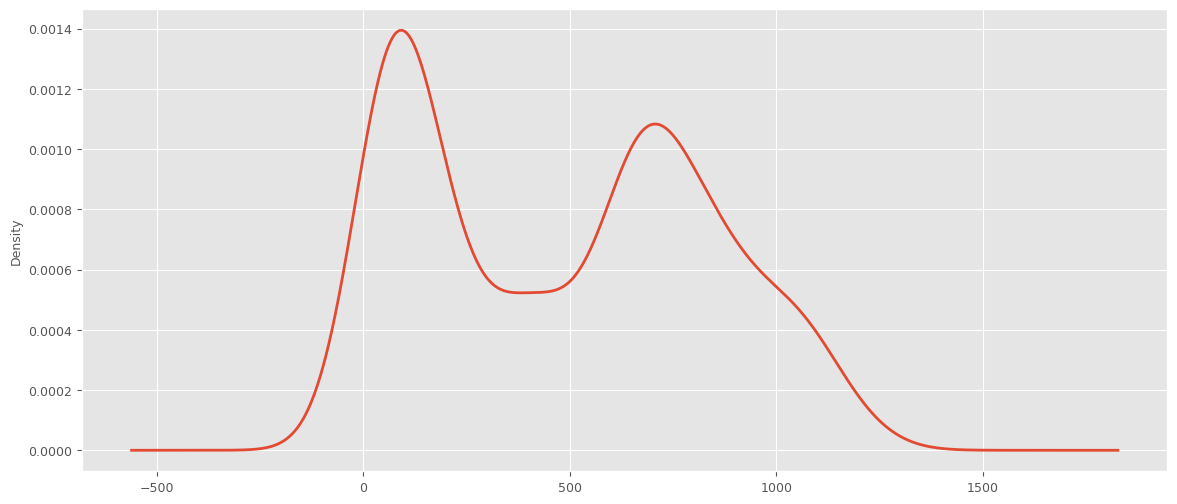

In [17]:
#Distribution Plot
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize=(14,6),linewidth=2)
plt.xticks(fontsize=9)
plt.grid('both')
plt.ylabel('Density',fontsize=9)
plt.yticks(fontsize=9)
plt.show()

##### MOVING AVERAGES

In [18]:
MA12 = stock_data['Close'].rolling(120)

In [19]:
rollmean = MA12.mean()

In [20]:
rollstd = MA12.std()

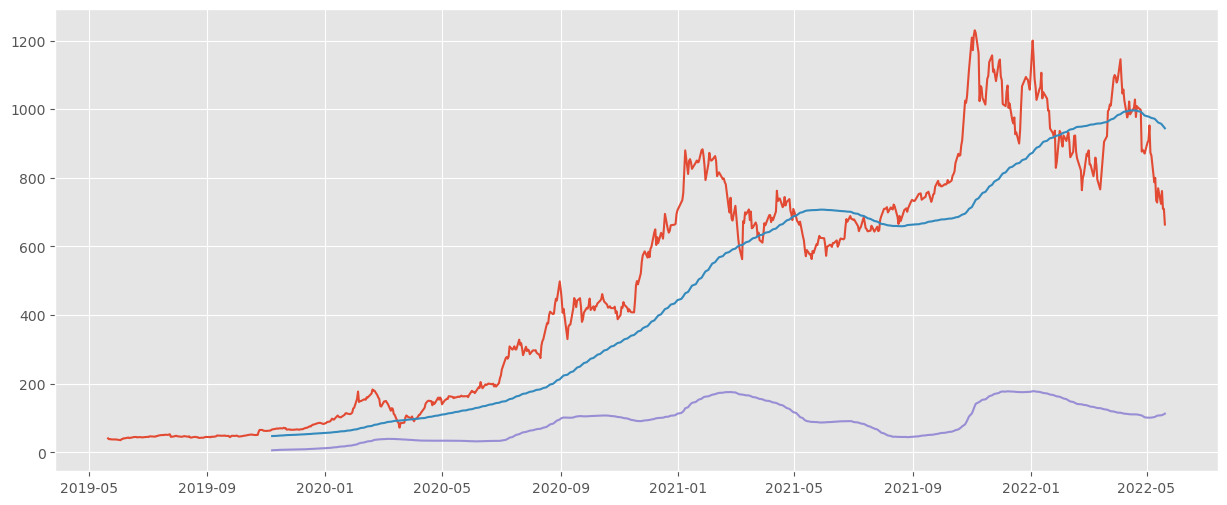

In [21]:
plt.figure(figsize=(15,6))
plt.plot(stock_data.Close)
plt.plot(rollmean)
plt.plot(rollstd)

In [22]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])

In [23]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [24]:
def test_stationary(timeseries):
    rollmean = timeseries.rolling(12).mean()
    rollstd = timeseries.rolling(12).std()
    
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=2)
    plt.plot(rollmean,color='red',label='Rolling Mean',linewidth=2)
    plt.plot(rollstd,color='black',label='Rolling Std',linewidth=2)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation',fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics', 'p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)



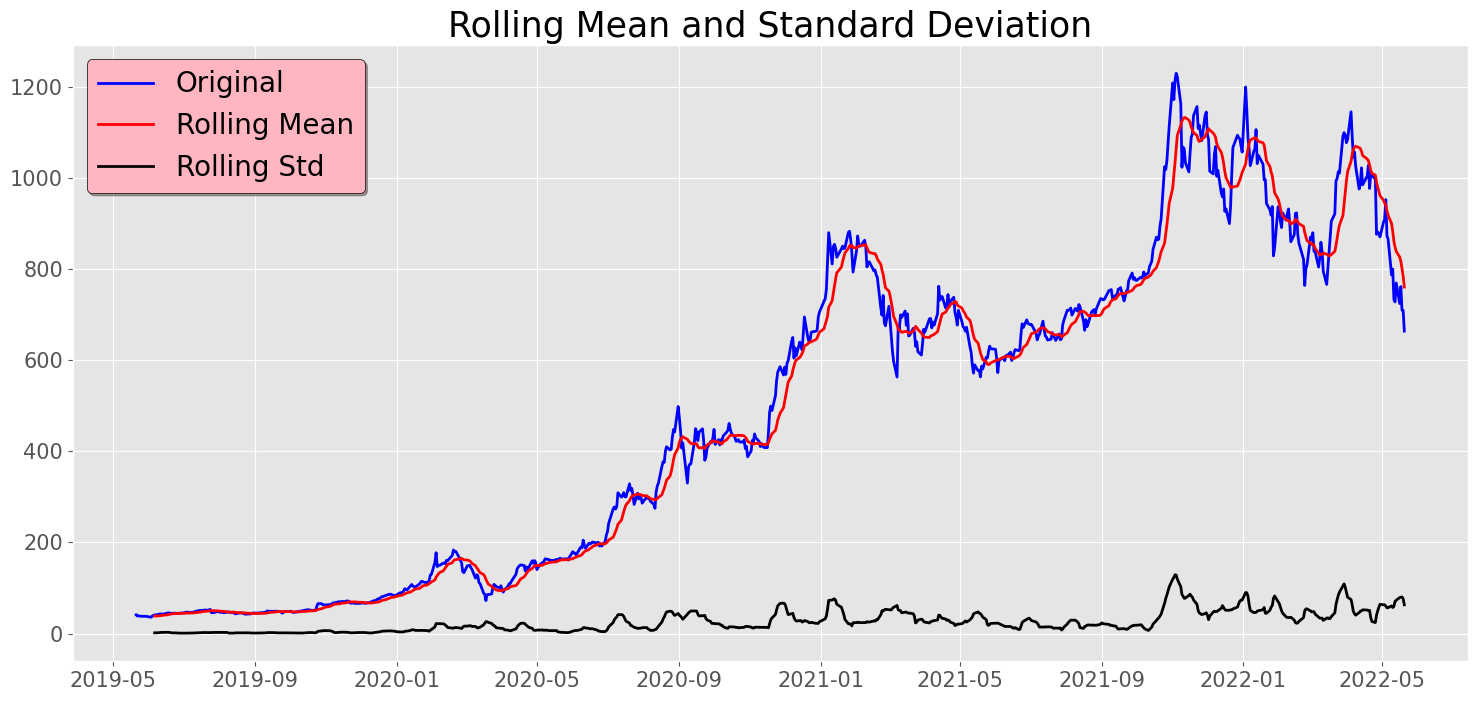

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [25]:
test_stationary(stock_data.Close)

<Axes: ylabel='Close'>

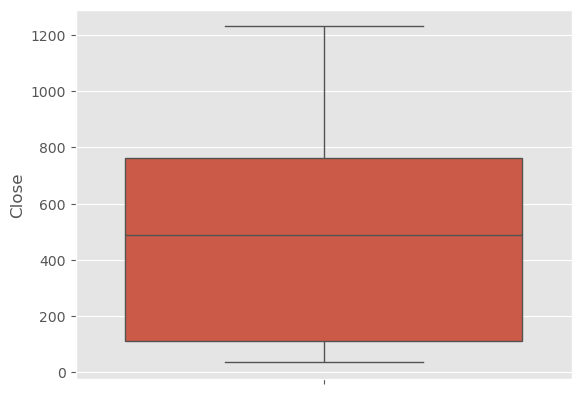

In [26]:
sns.boxplot(stock_data.Close)

In [27]:
# time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']],period=12)

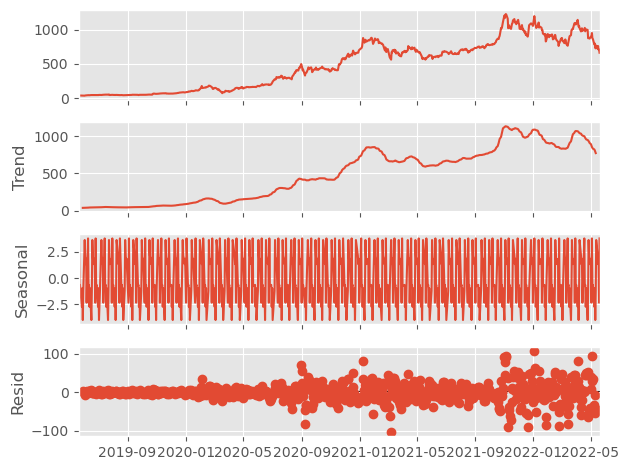

<Figure size 1700x1000 with 0 Axes>

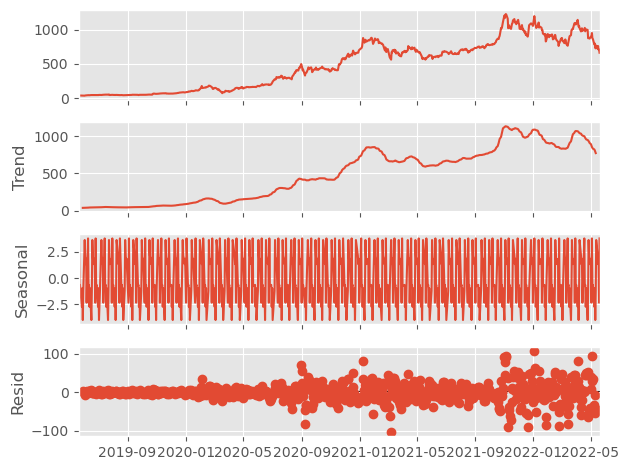

In [28]:
fig = plt.figure(figsize=(20,10))

fig.set_size_inches(17,10)
result.plot()




In [29]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

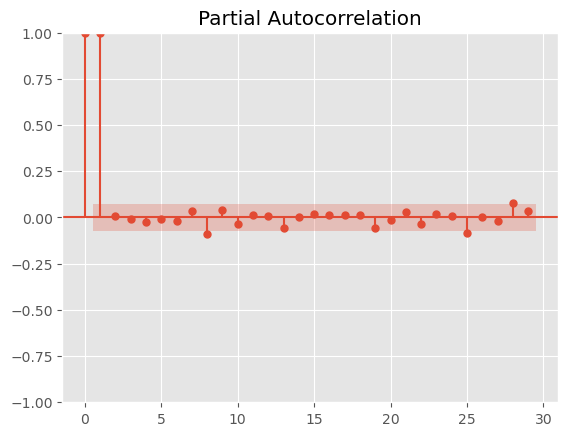

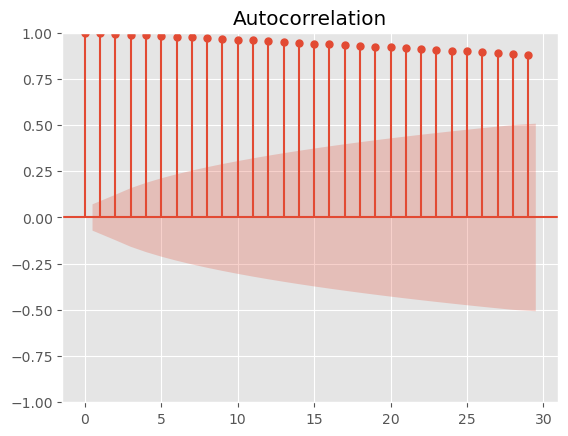

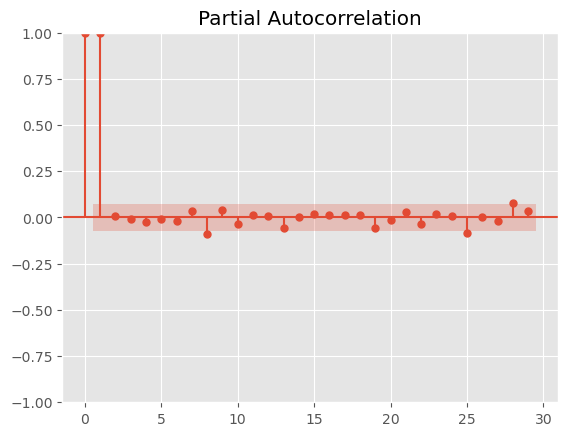

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

## X-axis is the Lag value
## y_axis is the correlation value

In [31]:
# Preprocessing DATA
# 1. Fill the missing
# 2. Convert the data into stationary time-series
# 3. If necessary then normalize the data(here) not required
# 4. Split the data into train and test 
# 5. Clean the data by removing the outlier (here not required)

In [32]:
df_close = stock_data['Close']

In [33]:
df_close = df_close.diff(5)
df_close = df_close.dropna()

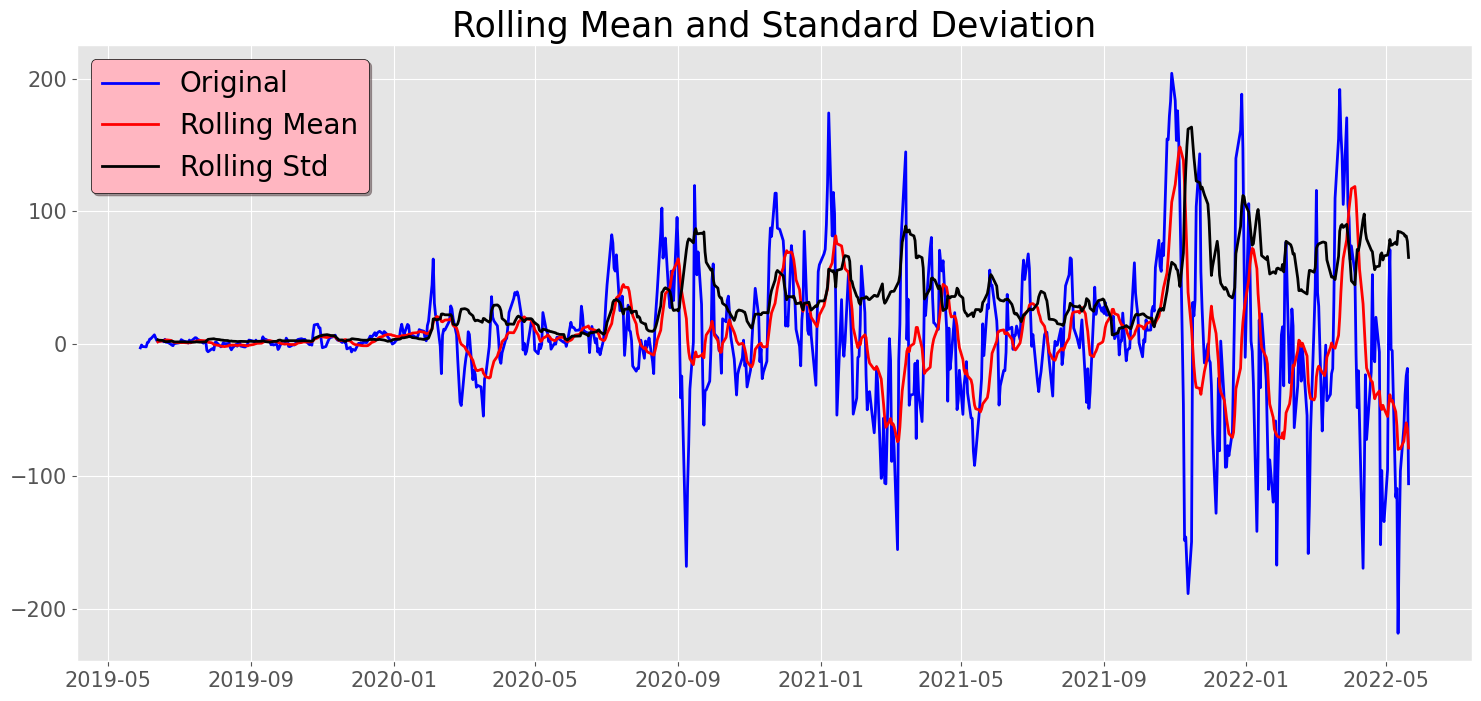

Results of dickey fuller test
Test Statistics                 -4.212211
p-value                          0.000628
No. of lags used                20.000000
Number of observations used    732.000000
critical value (1%)             -3.439315
critical value (5%)             -2.865497
critical value (10%)            -2.568877
dtype: float64


In [34]:
test_stationary(df_close)

In [35]:
df_close.shape

(753,)

In [36]:
train_data = df_close[0:-60]

In [37]:
test_data = df_close[-60:]

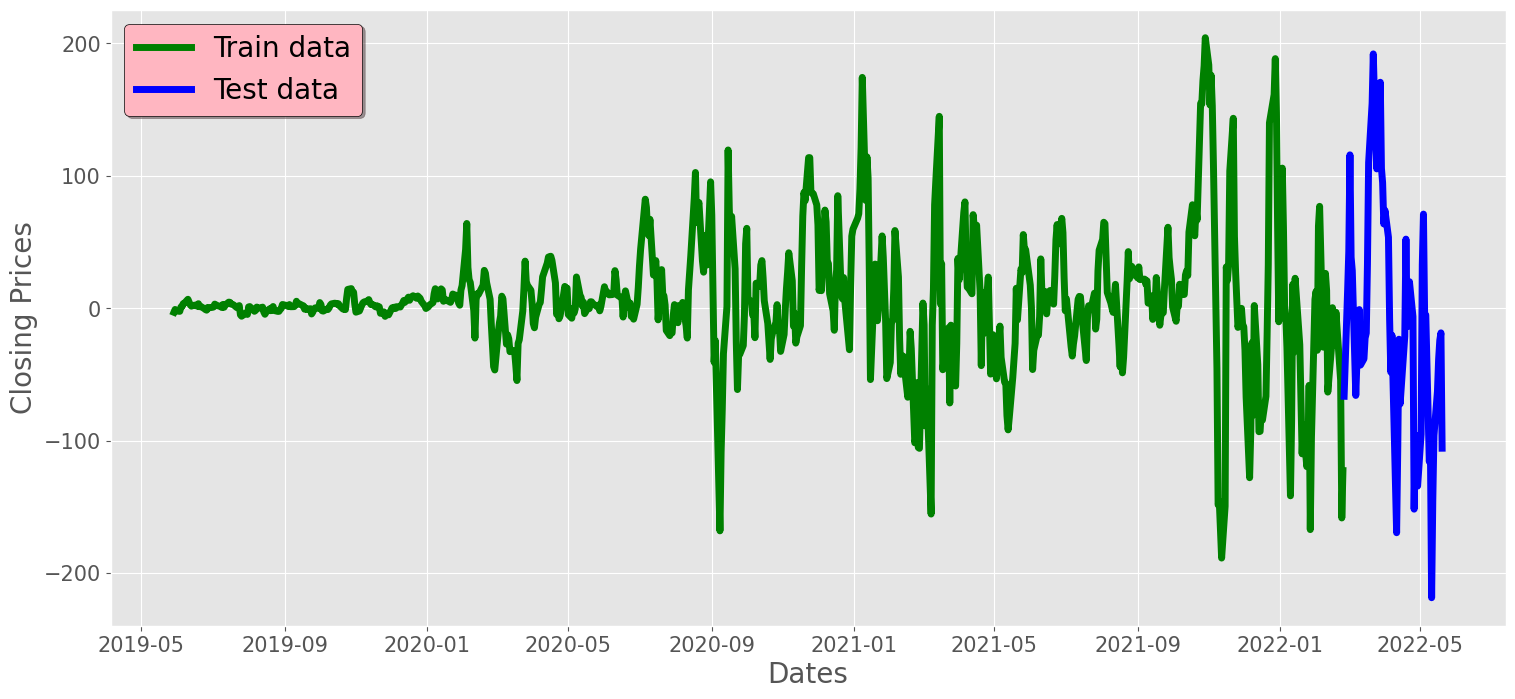

In [38]:
#plotting train and test data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train data',linewidth=5)
plt.plot(test_data,'blue',label='Test data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

#### Time Series Model Building 

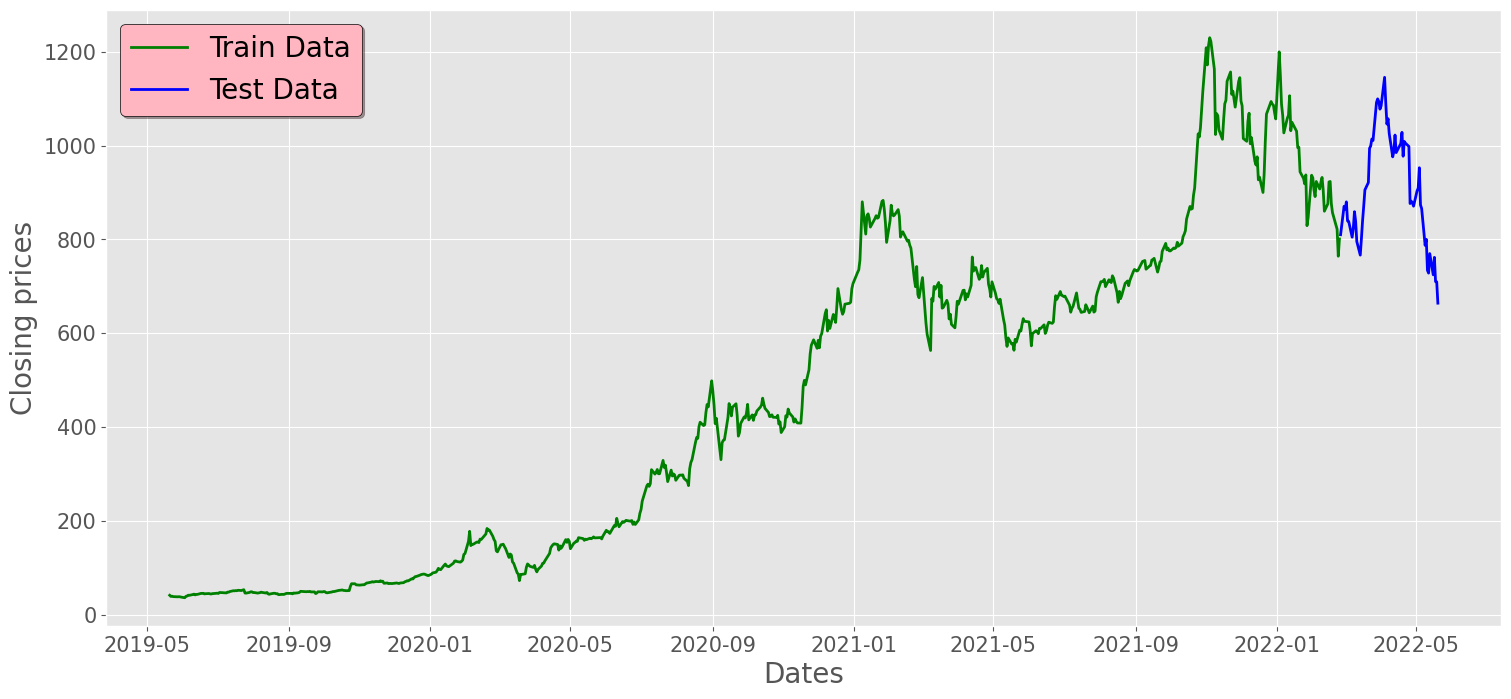

In [39]:
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing prices',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train Data',linewidth=2)
plt.plot(test_data,'blue',label='Test Data',linewidth=2)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')


In [40]:
stock_data['Close'].shape

(758,)

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [42]:
history = [x for x in train_data]

In [43]:
model = ARIMA(history,order=(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Mon, 24 Feb 2025   AIC                           6306.700
Time:                        09:16:52   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model.forecast()

array([800.20438282])

In [45]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\pankr\AppData\Local\Temp\ipykernel_7260\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


93.4240610703914

In [46]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\pankr\AppData\Local\Temp\ipykernel_7260\2013795996.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


9.66561229671413

In [47]:
def train_arima_model(X,y,arima_order):
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [48]:
def evaluate_models(dataset,test,p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf'),None 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try: 
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA %s RMSE=%.3f' %(order,rmse))
                except:
                    continue
    
    print('Best ARIMA%s RMSE=%.3f' %(best_cfg,best_score))

In [49]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [50]:
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA (0, 0, 0) RMSE=457.414
ARIMA (0, 0, 1) RMSE=241.164
ARIMA (0, 0, 2) RMSE=176.866
ARIMA (0, 1, 0) RMSE=39.516
ARIMA (0, 1, 1) RMSE=39.482
ARIMA (0, 1, 2) RMSE=39.617
ARIMA (0, 2, 0) RMSE=57.835
ARIMA (0, 2, 1) RMSE=39.611
ARIMA (0, 2, 2) RMSE=39.580
ARIMA (1, 0, 0) RMSE=39.477
ARIMA (1, 0, 1) RMSE=39.449
ARIMA (1, 0, 2) RMSE=39.584
ARIMA (1, 1, 0) RMSE=39.475
ARIMA (1, 1, 1) RMSE=39.555
ARIMA (1, 1, 2) RMSE=39.935
ARIMA (1, 2, 0) RMSE=46.184
ARIMA (1, 2, 1) RMSE=39.573
ARIMA (1, 2, 2) RMSE=39.731
ARIMA (2, 0, 0) RMSE=39.440
ARIMA (2, 0, 1) RMSE=39.494
ARIMA (2, 0, 2) RMSE=39.581
ARIMA (2, 1, 0) RMSE=39.635
ARIMA (2, 1, 1) RMSE=39.759
ARIMA (2, 1, 2) RMSE=39.629
ARIMA (2, 2, 0) RMSE=45.781
ARIMA (2, 2, 1) RMSE=39.739
ARIMA (2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [51]:
history = [x for x in train_data]
prediction = list()
for i in range(len(test_data)):
   model = ARIMA(history,order=(2,0,0)) 
   model = model.fit()
   fc = model.forecast(alpha=0.05)
   prediction.append(fc)
   history.append(test_data[i])

print(f"RMSE: {np.sqrt(mean_squared_error(test_data,prediction))}")


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)

RMSE: 39.43992597460807


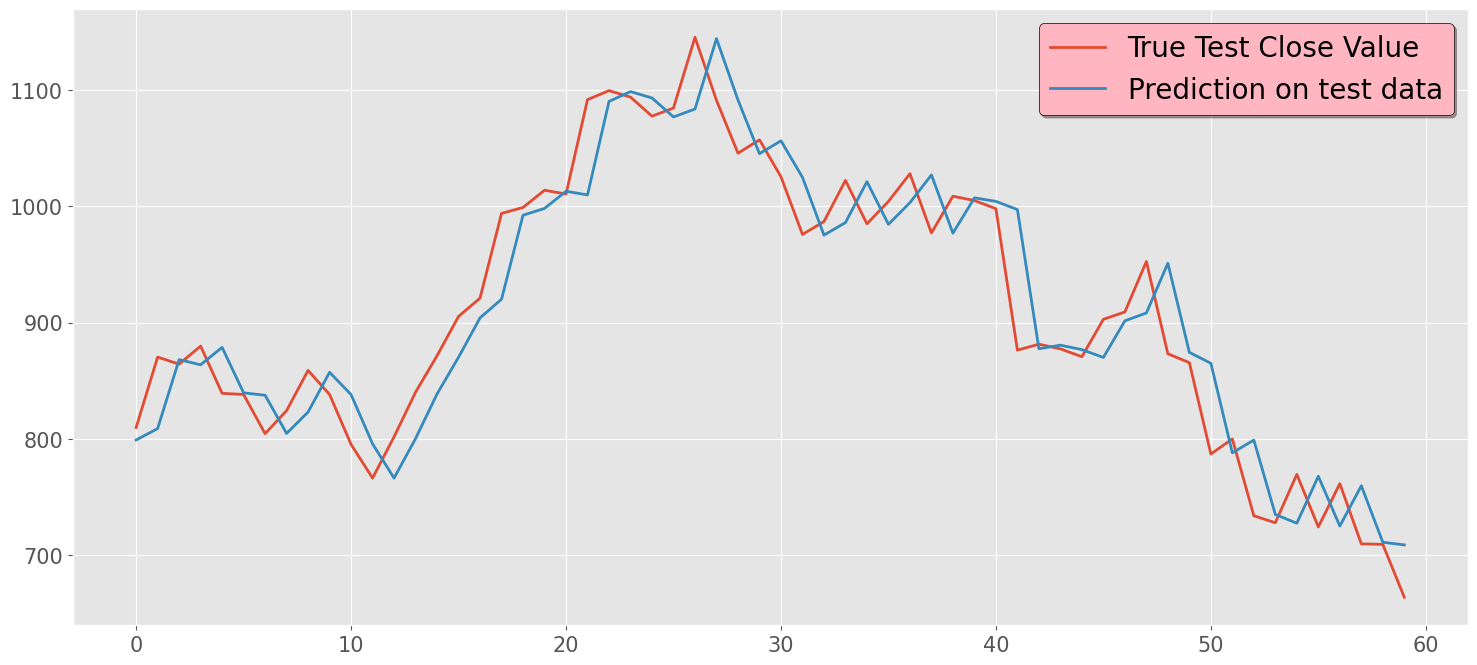

In [52]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label = "True Test Close Value",linewidth=2)
plt.plot(range(len(prediction)),prediction,label='Prediction on test data',linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [54]:
fc_series = pd.Series(prediction,index=test_data.index)

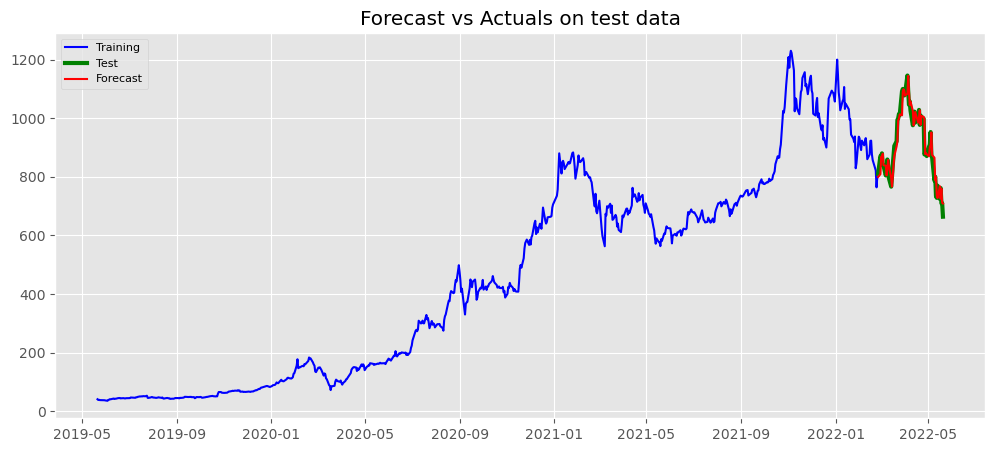

In [55]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label='Training',color='blue')
plt.plot(test_data,label='Test',color='green',linewidth=3)
plt.plot(fc_series,label='Forecast',color='red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left',fontsize=8)
plt.show()

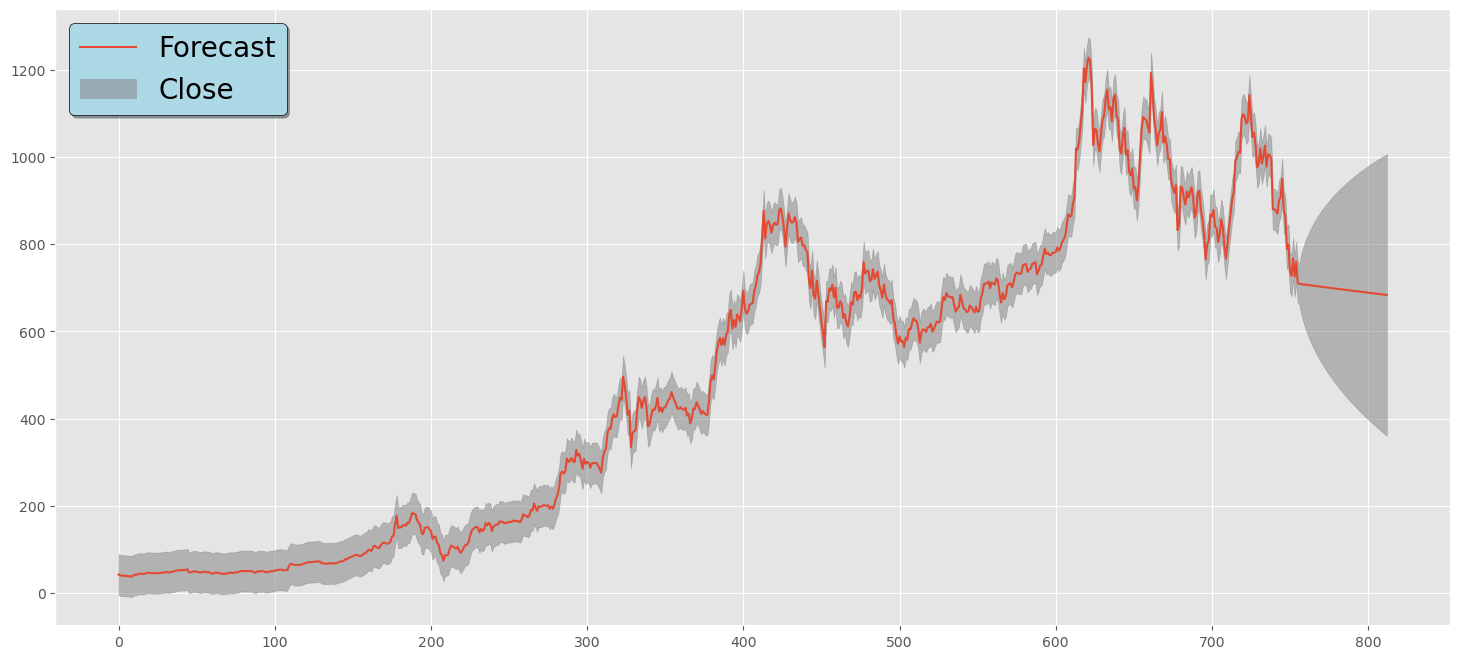

In [57]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model,start=1,end=len(df_close)+60,ax=ax1)
plt.grid('both')
plt.legend(['Forecast','Close','95% confidence interval'],fontsize=20,shadow=True,facecolor='lightblue',edgecolor='k')
plt.show()